### Load libraries and IMBD data set.

In [69]:
from keras.datasets import imdb
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [121]:
#Load testing and training sets from IMBD
#Skip top 10 most common words and look at 10,000 most popular words total
top_words = 10000
train, test = imdb.load_data(path="imdb.npz",
                          num_words=top_words,
                          skip_top=10,
                          maxlen=None,
                          seed=113,
                          start_char=1,
                          oov_char=2,
                          index_from=3)

In [122]:
trainX, trainY = train

In [123]:
testX, testY = test

In [124]:
max_words = 250
trainX = sequence.pad_sequences(trainX, maxlen=max_words)
testX = sequence.pad_sequences(testX, maxlen=max_words)

Notes: These integers below that indicate the absolute popularity of the word in the dataset.

In [73]:
#words already converted to int
trainX[0]

[2,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 2,
 173,
 36,
 256,
 2,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 2,
 35,
 480,
 284,
 2,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 2,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 2,
 192,
 50,
 16,
 2,
 147,
 2025,
 19,
 14,
 22,
 2,
 1920,
 4613,
 469,
 2,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 2,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 2,
 62,
 386,
 12,
 2,
 316,
 2,
 106,
 2,
 2,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 2,
 130,
 12,
 16,
 38,
 619,
 2,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 2,
 22,
 12,
 215,
 28,
 77,
 52,
 2,
 14,
 407,
 16,
 82,
 2,
 2,
 2,
 107,
 117,
 5952,
 15,
 256,
 2,
 2,
 2,
 3766,
 2,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 2,
 2,
 2,
 1029,
 13,
 104,
 88,
 2,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 2,
 194,
 7486,
 18,
 2,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 2,
 144,
 30,
 5535,
 18,

In [75]:
#50000 rows in the IMBD dataset
print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [76]:
np.unique(y)

array([0, 1], dtype=int64)

In [77]:
X_df = pd.DataFrame(X)
X_df.head()

,0
0,"[2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[2, 194, 1153, 194, 8255, 78, 228, 2, 2, 1463,..."
2,"[2, 14, 47, 2, 30, 31, 2, 2, 249, 108, 2, 2, 5..."
3,"[2, 2, 2, 2, 33, 2804, 2, 2040, 432, 111, 153,..."
4,"[2, 249, 1323, 2, 61, 113, 10, 10, 13, 1637, 1..."


### Visualize the data.

In [78]:
review_length = [len(x) for x in X]

In [79]:
review_length[:5]

[218, 189, 141, 550, 147]

In [80]:
print(np.mean(review_length))
print(np.std(review_length))

234.75892
172.911494587


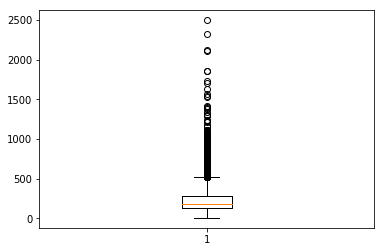

In [81]:
plt.boxplot(review_length)
plt.show()

### Neural Network 1

In [125]:
# set-up lSTM Neural Network
model1 = Sequential()
model1.add(Embedding(top_words, max_words))
model1.add(LSTM(max_words,dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(250, activation='relu'))
# set-up for binary (classification) output
model1.add(Dense(1, activation='sigmoid'))

In [126]:
model1.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 250)         2500000   
_________________________________________________________________
lstm_14 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_14 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 251       
Total params: 3,064,001
Trainable params: 3,064,001
Non-trainable params: 0
_________________________________________________________________
None


### Model 1

In [90]:
model1.fit(trainX, trainY, 
           batch_size=32, epochs=20, verbose=2)

Epoch 1/20
 - 1922s - loss: 0.4781 - acc: 0.7730
Epoch 2/20
 - 4716s - loss: 0.3310 - acc: 0.8646
Epoch 3/20
 - 9674s - loss: 0.2531 - acc: 0.8964
Epoch 4/20
 - 966s - loss: 0.1832 - acc: 0.9310
Epoch 5/20
 - 2517s - loss: 0.1347 - acc: 0.9498
Epoch 6/20
 - 987s - loss: 0.0967 - acc: 0.9652
Epoch 7/20
 - 4330s - loss: 0.0702 - acc: 0.9752
Epoch 8/20
 - 990s - loss: 0.0472 - acc: 0.9847
Epoch 9/20
 - 968s - loss: 0.0356 - acc: 0.9880
Epoch 10/20
 - 1350s - loss: 0.0283 - acc: 0.9908
Epoch 11/20
 - 997s - loss: 0.0194 - acc: 0.9936
Epoch 12/20
 - 993s - loss: 0.0197 - acc: 0.9932
Epoch 13/20
 - 1041s - loss: 0.0161 - acc: 0.9951
Epoch 14/20
 - 980s - loss: 0.0135 - acc: 0.9955
Epoch 15/20
 - 980s - loss: 0.0124 - acc: 0.9958
Epoch 16/20
 - 978s - loss: 0.0103 - acc: 0.9967
Epoch 17/20
 - 963s - loss: 0.0098 - acc: 0.9968
Epoch 18/20
 - 982s - loss: 0.0104 - acc: 0.9965
Epoch 19/20
 - 984s - loss: 0.0058 - acc: 0.9981
Epoch 20/20
 - 1489s - loss: 0.0078 - acc: 0.9976


In [92]:
score, acc = model1.evaluate(testX, testY, batch_size=32, verbose=2)
print('Test Score:', score)
print('Test Accuracy:', acc)

Test Score: 1.02652707795
Test Accuracy: 0.85416


I'm concerned that this model overfit. Seems like 6 or 7 epochs might have been ideal because after that- there was not much improvement.

### Model 2

Cutting epochs to 7 in effort to minimize overfitting.

In [127]:
model1.fit(trainX, trainY, batch_size=32, epochs=7, verbose=2)

Epoch 1/7
 - 1873s - loss: 0.4868 - acc: 0.7636
Epoch 2/7
 - 1198s - loss: 0.3675 - acc: 0.8403
Epoch 3/7
 - 1203s - loss: 0.3068 - acc: 0.8667
Epoch 4/7
 - 1191s - loss: 0.1662 - acc: 0.9378
Epoch 5/7
 - 1198s - loss: 0.1105 - acc: 0.9601
Epoch 6/7
 - 1201s - loss: 0.0709 - acc: 0.9762
Epoch 7/7
 - 1199s - loss: 0.0459 - acc: 0.9850


In [128]:
score, acc = model1.evaluate(testX, testY, batch_size=32, verbose=2)
print('Test Score:', score)
print('Test Accuracy:', acc)

Test Score: 0.573491172755
Test Accuracy: 0.86004


So, there was probably some over-fitting going on since accuracy improved a bit!

Next question- is it really helping to apply both ReLu and Sigmoid?

### Model 3

In [131]:
# set-up lSTM Neural Network
model3 = Sequential()
model3.add(Embedding(top_words, max_words))
model3.add(LSTM(max_words,dropout=0.2, recurrent_dropout=0.2))
#model3.add(Dense(250, activation='relu'))
# set-up for binary (classification) output
model3.add(Dense(1, activation='sigmoid'))

In [132]:
model3.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 250)         2500000   
_________________________________________________________________
lstm_15 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 251       
Total params: 3,001,251
Trainable params: 3,001,251
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
model3.fit(trainX, trainY, batch_size=32, epochs=7, verbose=2)

Epoch 1/7
 - 1191s - loss: 0.4896 - acc: 0.7645
Epoch 2/7
 - 1198s - loss: 0.3426 - acc: 0.8556
Epoch 3/7
 - 1195s - loss: 0.2818 - acc: 0.8844
Epoch 4/7
 - 1200s - loss: 0.1879 - acc: 0.9282
Epoch 5/7
 - 1202s - loss: 0.1299 - acc: 0.9522
Epoch 6/7
 - 1198s - loss: 0.0927 - acc: 0.9671
Epoch 7/7
 - 1200s - loss: 0.0641 - acc: 0.9786


In [134]:
score, acc = model3.evaluate(testX, testY, batch_size=32, verbose=2)
print('Test Score:', score)
print('Test Accuracy:', acc)

Test Score: 0.5418684484
Test Accuracy: 0.86096


So, ReLu was not improving performance in this case.